In [1]:
import sqlite3 
import pandas as pd
#import pandas_profiling as pp
import numpy as np

import statsmodels.api as sm

In [2]:
conn = sqlite3.connect('traffic.db')

In [3]:
sql_master = """SELECT * FROM sqlite_master"""
pd.read_sql_query(sql_master, conn)

,type,name,tbl_name,rootpage,sql
0,table,traffic,traffic,2,"CREATE TABLE traffic(\n ""SeqID"" TEXT,\n ""Dat..."


In [4]:
sql_master = """SELECT sql FROM sqlite_master"""
pd.read_sql_query(sql_master, conn)

,sql
0,"CREATE TABLE traffic(\n ""SeqID"" TEXT,\n ""Dat..."


In [5]:
sql_all = "SELECT * FROM traffic"
all_df = pd.read_sql_query(sql_all, conn)

In [6]:
#pp.ProfileReport(all_df)

In [7]:
all_df.describe()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
count,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,...,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036
unique,867384,2710,1440,1,9,13987,210296,298798,339125,6,...,7940,69,71,19,749951,6,6,63,145,25
top,33c49de3-9e36-4f36-9326-b59a95e86fe8,03/17/2015,23:30:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WAYNE AVE @ DALE DR,0,0,No,...,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)",4,4,36,17,1
freq,59,1281,2312,1529036,375716,125683,2172,110485,110485,1482066,...,380216,1379705,1329309,1267088,110485,334292,334292,184196,131235,1161876


In [8]:
all_df['Violation Type'].value_counts()

Warning     760397
Citation    693505
ESERO        74235
SERO           899
Name: Violation Type, dtype: int64

In [9]:
grouped_race_violation = all_df.groupby(['Race', 'Violation Type']).size().astype(float)

In [10]:
all_df.groupby(['Race']).size()

Race
ASIAN               89675
BLACK              484206
HISPANIC           326826
NATIVE AMERICAN      3168
OTHER               83378
WHITE              541783
dtype: int64

In [11]:
all_df['Arrest Type'].value_counts()

A - Marked Patrol                         1267088
Q - Marked Laser                           139542
B - Unmarked Patrol                         48181
S - License Plate Recognition               14509
O - Foot Patrol                             14076
L - Motorcycle                              13031
E - Marked Stationary Radar                  9511
G - Marked Moving Radar (Stationary)         8210
R - Unmarked Laser                           6140
I - Marked Moving Radar (Moving)             2476
M - Marked (Off-Duty)                        2272
H - Unmarked Moving Radar (Stationary)       1115
F - Unmarked Stationary Radar                 837
J - Unmarked Moving Radar (Moving)            654
C - Marked VASCAR                             483
P - Mounted Patrol                            338
D - Unmarked VASCAR                           302
N - Unmarked (Off-Duty)                       216
K - Aircraft Assist                            55
Name: Arrest Type, dtype: int64

In [12]:
sum(grouped_race_violation['WHITE'])

541783.0

In [13]:
grouped_normalize = grouped_race_violation.copy()

for race in grouped_race_violation.index.levels[0]:
    race_viol = sum(grouped_race_violation[race])
    for viol in grouped_race_violation.index.levels[1]:
        try:
            grouped_normalize[race][viol] = grouped_race_violation[race][viol] / float(race_viol)
        except:
            pass

In [14]:
grouped_normalize

Race             Violation Type
ASIAN            Citation          0.377285
                 ESERO             0.051709
                 SERO              0.000379
                 Warning           0.570627
BLACK            Citation          0.466892
                 ESERO             0.047441
                 SERO              0.000529
                 Warning           0.485139
HISPANIC         Citation          0.518475
                 ESERO             0.062510
                 SERO              0.000826
                 Warning           0.418189
NATIVE AMERICAN  Citation          0.410354
                 ESERO             0.068182
                 Warning           0.521465
OTHER            Citation          0.388484
                 ESERO             0.045180
                 SERO              0.000516
                 Warning           0.565821
WHITE            Citation          0.425370
                 ESERO             0.041002
                 SERO              0.000546


In [15]:
all_df.groupby(['Race', 'Arrest Type']).size().astype(float)

Race   Arrest Type                           
ASIAN  A - Marked Patrol                          73514.0
       B - Unmarked Patrol                         2400.0
       C - Marked VASCAR                             41.0
       D - Unmarked VASCAR                           22.0
       E - Marked Stationary Radar                  731.0
       F - Unmarked Stationary Radar                 50.0
       G - Marked Moving Radar (Stationary)         543.0
       H - Unmarked Moving Radar (Stationary)        60.0
       I - Marked Moving Radar (Moving)             114.0
       J - Unmarked Moving Radar (Moving)            37.0
       K - Aircraft Assist                            1.0
       L - Motorcycle                               838.0
       M - Marked (Off-Duty)                        169.0
       N - Unmarked (Off-Duty)                        7.0
       O - Foot Patrol                              800.0
       P - Mounted Patrol                            24.0
       Q - Marked Laser   

In [16]:
all_df['Arrest Type'].value_counts(True)

A - Marked Patrol                         0.828684
Q - Marked Laser                          0.091261
B - Unmarked Patrol                       0.031511
S - License Plate Recognition             0.009489
O - Foot Patrol                           0.009206
L - Motorcycle                            0.008522
E - Marked Stationary Radar               0.006220
G - Marked Moving Radar (Stationary)      0.005369
R - Unmarked Laser                        0.004016
I - Marked Moving Radar (Moving)          0.001619
M - Marked (Off-Duty)                     0.001486
H - Unmarked Moving Radar (Stationary)    0.000729
F - Unmarked Stationary Radar             0.000547
J - Unmarked Moving Radar (Moving)        0.000428
C - Marked VASCAR                         0.000316
P - Mounted Patrol                        0.000221
D - Unmarked VASCAR                       0.000198
N - Unmarked (Off-Duty)                   0.000141
K - Aircraft Assist                       0.000036
Name: Arrest Type, dtype: float

In [17]:
len(all_df)

1529036

In [18]:
descrips = all_df.Description.value_counts()

In [19]:
descrips

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                              125683
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                       71761
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                                   48988
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND                39953
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                             37487
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                                36176
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                                 34753
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE        30109
DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REGISTRATION PLATES AND VALIDATION TABS                       25113
E

In [20]:
np.percentile(descrips.values, 90, axis=0)

21.0

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
a = sorted(descrips.values)
cumsum_descrips = [sum(a[:i]) for i in range(len(a))]
#cumsum_descrips

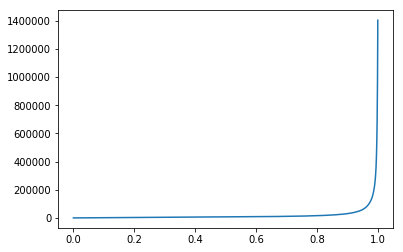

In [23]:
x_percentile = (np.array(range(len(a)))+1)/len(a)


plt.plot(x_percentile, cumsum_descrips)

In [24]:
all_df.Description.value_counts().index[1]

'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER'

In [25]:
viol_type = 'FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER'

all_df[all_df['Description'].isin([viol_type])].groupby('Race').size()

Race
ASIAN               5100
BLACK              24133
HISPANIC           13885
NATIVE AMERICAN      141
OTHER               4031
WHITE              24471
dtype: int64

In [26]:
sql_all = '''
SELECT * FROM traffic
WHERE race = 'BLACK'
ORDER BY RANDOM() 
LIMIT 5000
'''
df_black = pd.read_sql_query(sql_all, conn)
df_black.shape

(5000, 41)

In [27]:
sql_all = '''
SELECT * FROM traffic
WHERE race = 'HISPANIC'
ORDER BY RANDOM() 
LIMIT 5000
'''
df_hispanic = pd.read_sql_query(sql_all, conn)
df_hispanic.shape

(5000, 41)

In [28]:
from scipy.stats import ttest_ind

In [29]:
black_citation_sample = (df_black['Violation Type'] == 'Citation')*1
mu_black = sum(black_citation_sample) / len(black_citation_sample)

In [30]:
hispanic_citation_sample = (df_hispanic['Violation Type'] == 'Citation')*1
mu_hispanic = sum(hispanic_citation_sample) / len(hispanic_citation_sample)

In [31]:
ttest_ind(black_citation_sample, hispanic_citation_sample, equal_var=False)

Ttest_indResult(statistic=-3.9637808348644588, pvalue=7.428536324697079e-05)

In [75]:
def sample_from_traffic(n_sample, connection, race=None, gender=None):
    """Returns a random sample from the specified sqlite db connection, from the table called traffic.
    Order is randomized.
    Can specify a race to filter on.
    Prints the equivalent SQL query.
    Returns the dataframe result of the SQL query"""
    var_count = 0
    if race:
        condition = "WHERE race ='{}'".format(race.upper())
        var_count += 1
    else:
        condition = "--"
    if gender:
        if var_count > 0:
            condition = condition + """
            AND Gender = '{}'""".format(gender.upper()[0])
        else:
            condition = "WHERE gender ='{}'".format(gender.upper()[0])
    sql_str = '''
        SELECT * FROM traffic
        {0}
        ORDER BY RANDOM() 
        LIMIT {1}
        '''.format(condition, n_sample)
    print(sql_str)
    df = pd.read_sql_query(sql_str, connection)
    return df

In [77]:
df_white = sample_from_traffic(5000, conn, 'White')
df_black = sample_from_traffic(5000, conn, 'Black')
df_hispanic = sample_from_traffic(5000, conn, 'Hispanic')
df_asian = sample_from_traffic(5000, conn, 'Asian')
df_other = sample_from_traffic(5000, conn, 'other')

df_race_sample = pd.concat([df_white, df_asian, df_black, df_hispanic, df_other])


X = pd.get_dummies(df_race_sample['Race'], prefix='Race')
X = X.drop(columns='Race_WHITE')
y = (df_race_sample['Violation Type'] == 'Citation')*1
y.columns = ['Citation']

X = sm.add_constant(X)

model_init = sm.OLS(y, X).fit()
model_init.summary()


        SELECT * FROM traffic
        WHERE race ='WHITE'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='BLACK'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='HISPANIC'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='ASIAN'
        ORDER BY RANDOM() 
        LIMIT 5000
        

        SELECT * FROM traffic
        WHERE race ='OTHER'
        ORDER BY RANDOM() 
        LIMIT 5000
        


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Violation Type   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     75.64
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           7.49e-64
Time:                        17:04:22   Log-Likelihood:                -17753.
No. Observations:               25000   AIC:                         3.552e+04
Df Residuals:                   24995   BIC:                         3.556e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4290      0.007     61.621      0.000       0.415       0.443
Race_ASIAN       -0.0700      0.010     -7.110      0.000      -0.089      -0.051
Race_BLACK        0.0384      0.010      3.900      0.000       0.019       0.058
Race_HISPANIC     0.0816      0.010      8.288      0.000       0.062       0.101
Race_OTHER       -0.0406      0.010     -4.124      0.000      -0.060      -0.021
==============================================================================
Omnibus:                      302.786   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3978.069
Skew:                           0.274   Prob(JB):                         0.00
Kurtosis:                       1.124   Cond. No.                         5.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
df_test = sample_from_traffic(5000, conn)


        SELECT * FROM traffic
        --
        ORDER BY RANDOM() 
        LIMIT 5000
        


In [43]:
df_test.Race.value_counts()

WHITE              1778
BLACK              1585
HISPANIC           1039
OTHER               297
ASIAN               290
NATIVE AMERICAN      11
Name: Race, dtype: int64

In [49]:
pd.to_datetime(all_df['Date Of Stop'], format='%m/%d/%Y').describe()

count                 1529036
unique                   2710
top       2015-03-17 00:00:00
freq                     1281
first     2012-01-01 00:00:00
last      2019-06-03 00:00:00
Name: Date Of Stop, dtype: object

In [62]:
import datetime

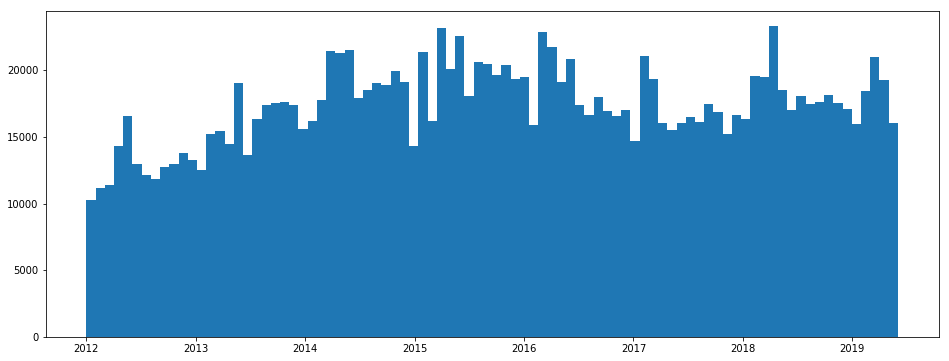

In [65]:
fig = plt.figure(figsize=(16, 6))
plt.hist(pd.to_datetime(all_df['Date Of Stop'], format='%m/%d/%Y'), bins=88);
#plt.xlim(datetime.date(2016,1,1))

In [68]:
all_df.Color.value_counts()

BLACK          311612
SILVER         279662
WHITE          237891
GRAY           172294
RED            119343
BLUE           111576
GREEN           54812
GOLD            46992
BLUE, DARK      32123
TAN             30408
MAROON          25856
BLUE, LIGHT     19699
BEIGE           17040
N/A             16362
GREEN, DK       15944
GREEN, LGT       8441
BROWN            6932
YELLOW           5684
ORANGE           5417
BRONZE           3477
PURPLE           2907
                 1746
MULTICOLOR       1157
CREAM             912
COPPER            469
PINK              211
CHROME             41
CAMOUFLAGE         28
Name: Color, dtype: int64